# Plot with error band

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

## Prepare some test data

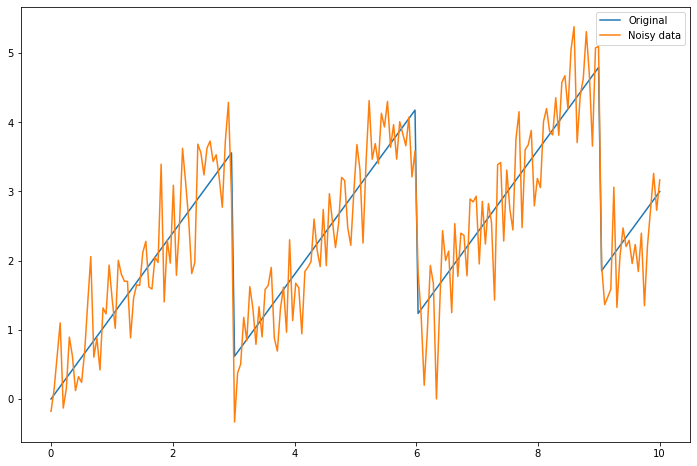

In [61]:
x=np.linspace(0,10,200)
y=np.mod(x,3)+x/5

# add some noise
np.random.seed(242)
ny=y+np.random.normal(0,0.5,size=len(x))

fig,ax =plt.subplots(1,figsize=(12,8))
ax.plot(x,y,label='Original')
ax.plot(x,ny,label='Noisy data');
ax.legend();

## Add some decorations
We want to add a trendline and error bands to the plot. The data points will be a scatter plot instead here.

First we need to prepare the average and standard deviation trend lines

In [62]:
w=21 # Moving average length, should be an odd number to avoid data shift by one point

trend_mean  = np.convolve(ny,np.ones(w),mode='same')/(w)
trend_sigma = np.sqrt(np.convolve((ny-trend_mean)**2,np.ones(w),mode='same')/(w-1))

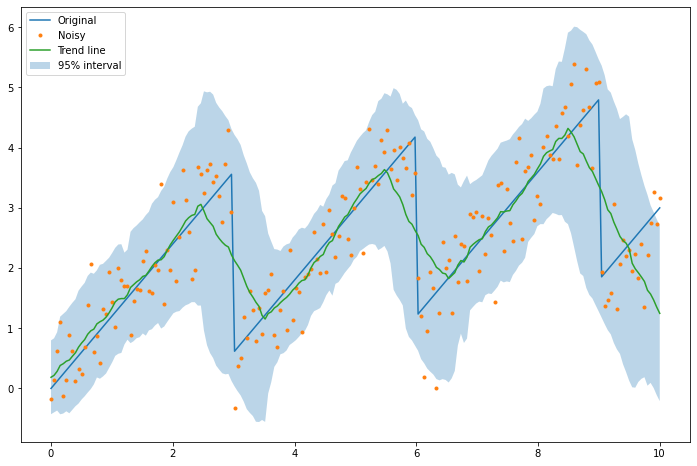

In [63]:
fig,ax =plt.subplots(1,figsize=(12,8))

ax.plot(x,y,label='Original')
ax.plot(x,ny,'.',label='Noisy')
ax.plot(x,trend_mean,label='Trend line')

k=1.96 # scaling factor for 95% interval
ax.fill_between(x,y1=trend_mean-k*trend_sigma,y2=trend_mean+k*trend_sigma,alpha=0.3,label='95% interval')
ax.legend();